In [1]:
#Numpy packages
import numpy as np
import pandas as pd

#Matplotlib packages
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import MaxNLocator

#NLTK Packages
import nltk
from nltk import FreqDist
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import RegexpTokenizer 

#String Packages
import re
import string

#Word Cloud Packages
from PIL import Image
from textblob import TextBlob
from wordcloud import WordCloud

In [2]:
#Instantiating NLTK Stopwords
nltk.download('stopwords')
stopwords = stopwords.words('english')

#Adding punctuation and stopwords to my list so they wont influence the sentiment analysis
new_stopwords = ['hurricane', 'harvey', 'irma', 'matthew', 'maria', 'hurricaneharvey', 'hurricanemaria', 'hurricaneirma']
punctuations = string.punctuation
stopwords.extend(new_stopwords)
stopwords.extend(punctuations)

#Creating a function that stems the tokens down to its root
stemmer = PorterStemmer()

#Importing combined Hurricanes dataset
hurricanes = pd.read_csv('hurricanes.csv')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/brettzimmerman/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
#Creating a function to clean the Tweets with Regex
def remove_junk(text):
    text = re.sub(r'@[A-Za-z0-9#]+', '', str(text)) #remove @mentions 
    text = re.sub(r'RT[\s]+', '', str(text)) # remove RT
    text = re.sub(r'https?:\/\/\S+', '', text) # removes actual links
    text = re.sub(r'#', '', str(text)) # remove hashtag symbol
    return text

#Creating a function to tokenize text
def tokenize(text):
    regex_token = RegexpTokenizer(r"([a-zA-Z]+(?:’[a-z]+)?)")
    tokenized_tweet = regex_token.tokenize(text)
    tweet_tokens = [word.lower() for word in tokenized_tweet]
    return tweet_tokens


#Creating a function that removes the previously defined stopwords
def remove_sw_punct(tweet_tokens):
    tweets_clean = [word for word in tweet_tokens if word not in stopwords]
    return tweets_clean

def stemming(tweets_clean):
    tweets_stem = [stemmer.stem(token) for token in tweets_clean]         
    return tweets_stem

#Combining the preprocessing into a function
def process_tweet(text):
    processed_tweet = remove_junk(text)
    tweet_tokens = tokenize(processed_tweet)
    tweets_clean = remove_sw_punct(tweet_tokens)
    tweets_stem = stemming(tweets_clean)
    return tweets_stem

In [4]:
hurricanes['processed_tweet'] = hurricanes['tweet_text'].apply(process_tweet)

Text(0.5, 0, 'Sentiment Class')

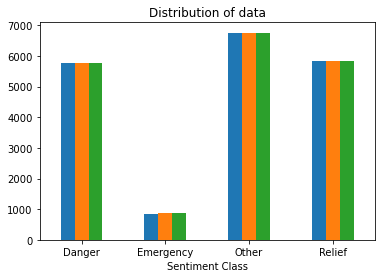

In [5]:
# Plotting the distribution for dataset.
ax = hurricanes.groupby('class_label').count().plot(kind='bar', title='Distribution of data', legend=False)
ax.set_xticklabels(['Danger','Emergency', 'Other', 'Relief'], rotation=0)
ax.set_xlabel('Sentiment Class')

In [6]:
#Creating a function to create word clouds out of the text belonging to the four classes
def create_wordcloud(sentiment, color):
    sent_class = hurricanes['processed_tweet'].loc[hurricanes['class_label'] == sentiment]

    sentiment_words = []
    for i in sent_class:
        listToStr = ' '.join(map(str, i))
        sentiment_words.append(listToStr)
    sentiment_words = ' '.join(map(str,  sentiment_words))

    # instantiate a word cloud object
    wc = WordCloud(
        background_color='white',
        max_words=2000,
        colormap=color
        )
    # generate the word cloud
    wc.generate(sentiment_words)

    plt.figure(figsize=(12,10))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

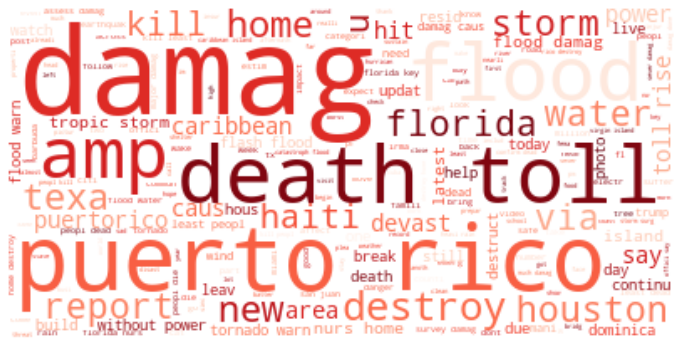

In [7]:
create_wordcloud('danger', 'Reds')

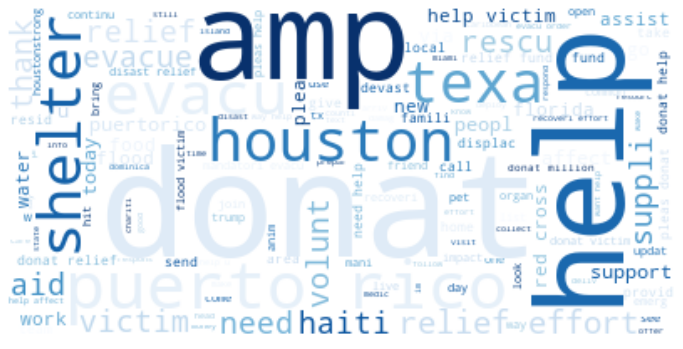

In [8]:
create_wordcloud('relief', 'Blues')

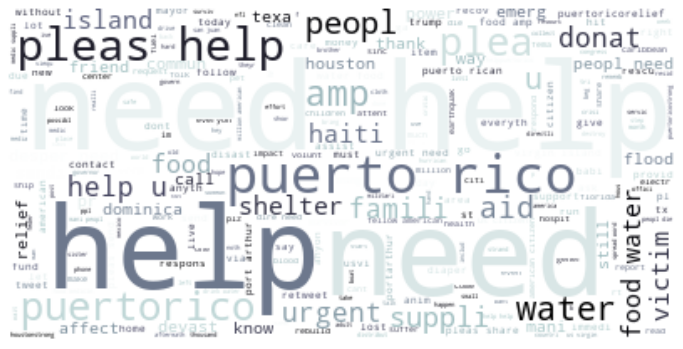

In [9]:
create_wordcloud('emergency', 'bone')

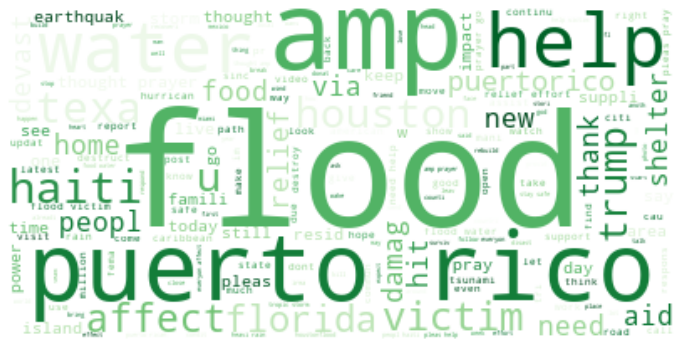

In [10]:
create_wordcloud('other', 'Greens')

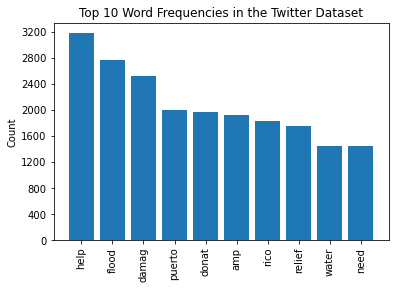

In [11]:
#Visualizing the word Frequency of the fully processed dataset
def visualize_top_10(freq_dist, title):

    # Extract data for plotting
    top_10 = list(zip(*freq_dist.most_common(10)))
    tokens = top_10[0]
    counts = top_10[1]

    # Set up plot and plot data
    fig, ax = plt.subplots()
    ax.bar(tokens, counts)

    # Customize plot appearance
    ax.set_title(title)
    ax.set_ylabel("Count")
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis="x", rotation=90)
    
freq_dist = FreqDist(hurricanes['processed_tweet'].explode())

# Plot the top 10 tokens
visualize_top_10(freq_dist, "Top 10 Word Frequencies in the Twitter Dataset")

# Visualization of the improvements made from using different models 

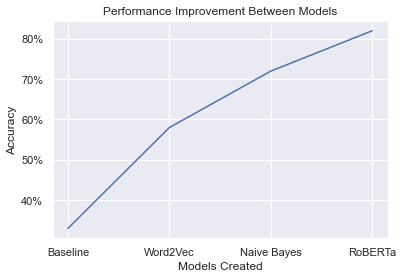

In [12]:
sns.set_theme(style="darkgrid")
graph_results = {'Accuracy': [.33, .58, .72, .82], 'Model': ['Baseline', 'Word2Vec', 'Naive Bayes', 'RoBERTa']}
ax = sns.lineplot(data=graph_results, x="Model", y="Accuracy")
ax.set_title("Performance Improvement Between Models")
ax.set_xlabel("Models Created");
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))